In [17]:
import pandas as pd

df = pd.read_csv('api_masjid_list.csv',sep=';')

In [18]:
df.columns

Index(['index_id', 'md_id_masjid', 'md_kabupaten_kota', 'md_kecamatan',
       'md_nama_masjid', 'md_tipologi', 'md_alamat', 'md_latitude',
       'md_longitude', 'md_luas_tanah', 'md_status_tanah', 'md_luas_bangunan',
       'md_tahun_berdiri', 'md_jumlah_jamaah', 'md_jumlah_imam',
       'md_jumlah_khatib', 'md_jumlah_muazin', 'md_jumlah_remaja',
       'md_nomor_kontak', 'md_source_data', 'md_approval_status', 'created_at',
       'updated_at'],
      dtype='object')

In [19]:
df_clean = df.drop(columns=['index_id','md_id_masjid','md_alamat','md_latitude','md_longitude','md_nomor_kontak','md_source_data','md_approval_status','created_at','updated_at'])

In [20]:
df_clean.describe()

,md_tahun_berdiri
count,472115.000000
mean,1942.204200
std,287.474949
min,-200.000000
25%,1973.000000
50%,1988.000000
75%,1999.000000
max,9999.000000


In [21]:
df_clean['md_tipologi'].nunique()

10

In [22]:
df_clean['md_luas_tanah'] = df_clean['md_luas_tanah'].str.replace('m2','').str.replace(' ','').str.replace('.','')
df_clean['md_luas_bangunan'] = df_clean['md_luas_bangunan'].str.replace('m2','').str.replace(' ','').str.replace('.','')

In [23]:
df_clean

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
0,KOTA BALIKPAPAN,Balikpapan Selatan,Masjid Darul Iman,Masjid di Tempat Publik,4117,Wakaf,-,2007.0,> 200,2,10,2,25
1,KAB. GARUT,Bl. Limbangan,Masjid MANARUL HUDA,Masjid di Tempat Publik,1657,Wakaf,168,1994.0,> 200,4,4,4,260
2,KAB. JENEPONTO,Binamu,Masjid AL- MUNAWWARAH,Masjid di Tempat Publik,302,Wakaf,125,2014.0,50 - 100,1,4,4,20
3,KAB. TEMANGGUNG,Jumo,Masjid FADZILAH HAMID,Masjid di Tempat Publik,80,Wakaf,80,2019.0,50 - 100,2,5,2,50
4,KOTA MAKASSAR,Manggala,Masjid NUR AT-TAUHID,Masjid di Tempat Publik,143,Wakaf,88,2001.0,50 - 100,1,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472120,KOTA BANDUNG,Sukasari,Mushalla Al-Ihlas,Mushalla Perkantoran,20,SHM,20,2011.0,16 - 30,-,-,-,-
472121,KOTA PANGKAL PINANG,Bukit Intan,Mushalla AL-IKHLAS,Mushalla Perkantoran,100,SHM,70,2005.0,> 50,6,-,-,-
472122,KOTA PADANG,Padang Barat,Mushalla Mambaul Ikhlas,Mushalla Perkantoran,300,SHM,120,1990.0,> 50,2,-,-,-
472123,KOTA PROBOLINGGO,Kanigaran,Mushalla Al-Amanah,Mushalla Perkantoran,-,SHM,70,1992.0,16 - 30,15,-,19,-


In [24]:
group_by_tipologi = df_clean.groupby('md_tipologi').md_kabupaten_kota.nunique()

In [25]:
group_by_tipologi.to_csv('group_test_2.csv')

In [26]:
group_by_kabupaten_tipologi = df_clean.groupby('md_kabupaten_kota').md_tipologi.nunique()

In [27]:
group_by_kabupaten_tipologi.to_csv('group_test.csv')

In [28]:
group_by_kabupaten = df_clean.groupby('md_kabupaten_kota').count()['md_kecamatan']

In [29]:
group_by_kabupaten

md_kabupaten_kota
KAB MALUKU TENGGARA BARAT     15
KAB PENAJAM PASER UTARA      293
KAB TANA TIDUNG               54
KAB TANJUNG JABUNG BARAT     688
KAB TANJUNG JABUNG TIMUR     474
                            ... 
KOTA TERNATE                 200
KOTA TIDORE KEPULAUAN        259
KOTA TOMOHON                   7
KOTA TUAL                     84
KOTA YOGYAKARTA              834
Name: md_kecamatan, Length: 492, dtype: int64

<AxesSubplot:xlabel='md_kabupaten_kota'>

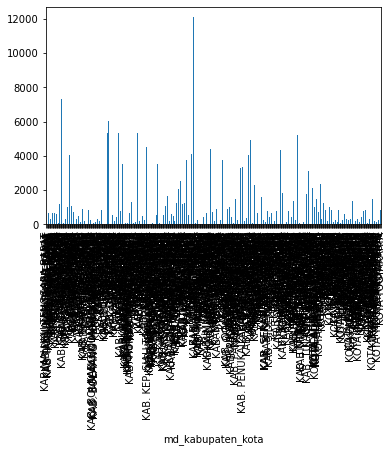

In [30]:
group_by_kabupaten.plot.bar()

In [31]:
group_by_kabupaten.to_csv('group_by_kabupaten.csv')

Malang district has a maximum count of Mosque than another district, we try to deep observe for the data

In [32]:
df_filter_by_malang = df_clean[df_clean['md_kabupaten_kota'] == 'KAB. MALANG']

In [33]:
df_filter_by_malang

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
18,KAB. MALANG,Pagelaran,Masjid NASRULLOH,Masjid di Tempat Publik,280,Wakaf,163,1999.0,100 - 150,7,4,5,13
74,KAB. MALANG,Dampit,Masjid Baitul Faaiziin,Masjid di Tempat Publik,441,Wakaf,182,2012.0,100 - 150,5,5,5,20
75,KAB. MALANG,Bantur,Masjid Al-Adenan,Masjid di Tempat Publik,1400,Wakaf,182,2008.0,50 - 100,2,2,2,15
81,KAB. MALANG,Bantur,Masjid NURUSSADILI,Masjid di Tempat Publik,256,Girik,81,1991.0,50 - 100,5,5,5,15
96,KAB. MALANG,Pagelaran,Masjid AL-KHOIROT,Masjid di Tempat Publik,118,Wakaf,81,1982.0,50 - 100,3,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469764,KAB. MALANG,Pujon,Mushalla AL-HIDAYAH KUA PUJON,Mushalla Perkantoran,25,SHM,20,1999.0,5 - 15,3,-,3,-
469765,KAB. MALANG,Pagak,Mushalla MUSHOLLA KANTOR DESA,Mushalla Perkantoran,30,SHM,30,1980.0,5 - 15,-,-,-,-
469768,KAB. MALANG,Donomulyo,"Mushalla ""An Nur""",Mushalla Perkantoran,55,Wakaf,50,1979.0,16 - 30,1,-,-,-
469772,KAB. MALANG,Ngantang,Mushalla KECAMATAN,Mushalla Perkantoran,-,Wakaf,-,2018.0,16 - 30,-,-,-,-


<AxesSubplot:xlabel='md_tahun_berdiri'>

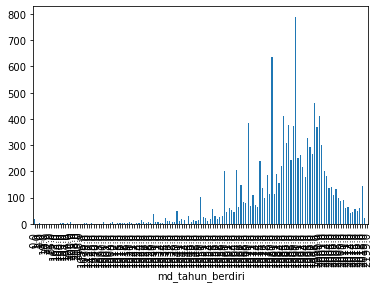

In [38]:
df_filter_by_malang.groupby('md_tahun_berdiri').count()['md_kabupaten_kota'].plot.bar()

Looks like the 'year' column isn't clean, we are trying to clean it 

In [39]:
df_filter_by_malang[df_filter_by_malang['md_tahun_berdiri'] < 1900]

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
5698,KAB. MALANG,Bululawang,Masjid NURUL MUTTAQIN,Masjid di Tempat Publik,397,Wakaf,397,163.0,50 - 100,5,5,5,30
5935,KAB. MALANG,Ngajum,Masjid Nurul Huda,Masjid di Tempat Publik,249,Wakaf,228,188.0,> 200,-,-,-,-
6501,KAB. MALANG,Tumpang,Masjid Al-Falah,Masjid di Tempat Publik,200,Wakaf,177,1198.0,150 - 200,-,-,-,-
6519,KAB. MALANG,Tumpang,Masjid Al-Hikmah,Masjid di Tempat Publik,150,Wakaf,150,1198.0,100 - 150,-,-,-,-
6893,KAB. MALANG,Singosari,Masjid Baitul Mukmin,Masjid di Tempat Publik,600,Wakaf,540,1770.0,> 200,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306610,KAB. MALANG,Pagelaran,Mushalla Al - Mansuri,Mushalla Perumahan,-,Wakaf,-,19.0,16 - 30,3,-,2,-
307581,KAB. MALANG,Pagelaran,Mushalla Babussalam,Mushalla Perumahan,90,Wakaf,42,200.0,16 - 30,2,-,2,-
307624,KAB. MALANG,Pagelaran,Mushalla Al-Huda,Mushalla Perumahan,90,Wakaf,56,200.0,16 - 30,2,-,2,-
307629,KAB. MALANG,Pagelaran,Mushalla Al-Marsak,Mushalla Perumahan,80,Wakaf,56,200.0,16 - 30,2,-,2,20


In [40]:
df_filter_by_malang[df_filter_by_malang['md_tahun_berdiri'] > 2020]

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
298759,KAB. MALANG,Sumbermanjing,Mushalla Mbah Mustafa,Mushalla Perumahan,20,SHM,20,2199.0,5 - 15,1,-,1,3


In [42]:
df_filter_by_malang_clean_year = df_filter_by_malang[(df_filter_by_malang['md_tahun_berdiri'] > 1900) & (df_filter_by_malang['md_tahun_berdiri'] < 2020)]

In [43]:
df_filter_by_malang_clean_year

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
18,KAB. MALANG,Pagelaran,Masjid NASRULLOH,Masjid di Tempat Publik,280,Wakaf,163,1999.0,100 - 150,7,4,5,13
74,KAB. MALANG,Dampit,Masjid Baitul Faaiziin,Masjid di Tempat Publik,441,Wakaf,182,2012.0,100 - 150,5,5,5,20
75,KAB. MALANG,Bantur,Masjid Al-Adenan,Masjid di Tempat Publik,1400,Wakaf,182,2008.0,50 - 100,2,2,2,15
81,KAB. MALANG,Bantur,Masjid NURUSSADILI,Masjid di Tempat Publik,256,Girik,81,1991.0,50 - 100,5,5,5,15
96,KAB. MALANG,Pagelaran,Masjid AL-KHOIROT,Masjid di Tempat Publik,118,Wakaf,81,1982.0,50 - 100,3,4,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469764,KAB. MALANG,Pujon,Mushalla AL-HIDAYAH KUA PUJON,Mushalla Perkantoran,25,SHM,20,1999.0,5 - 15,3,-,3,-
469765,KAB. MALANG,Pagak,Mushalla MUSHOLLA KANTOR DESA,Mushalla Perkantoran,30,SHM,30,1980.0,5 - 15,-,-,-,-
469768,KAB. MALANG,Donomulyo,"Mushalla ""An Nur""",Mushalla Perkantoran,55,Wakaf,50,1979.0,16 - 30,1,-,-,-
469772,KAB. MALANG,Ngantang,Mushalla KECAMATAN,Mushalla Perkantoran,-,Wakaf,-,2018.0,16 - 30,-,-,-,-


<AxesSubplot:xlabel='md_kecamatan'>

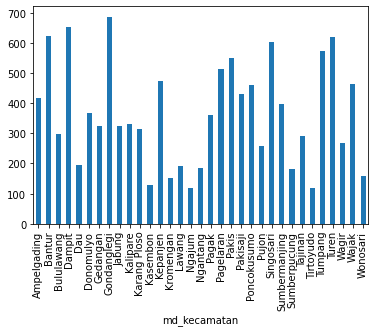

In [46]:
df_filter_by_malang_clean_year.groupby('md_kecamatan').count()['md_kabupaten_kota'].plot.bar()

NEWS (timesindonesia.co.id) : Masjid Baitul Hikmah Rp 4 M Gondanglegi diresmikan

<AxesSubplot:xlabel='md_tipologi'>

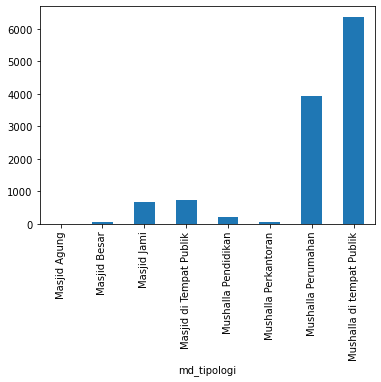

In [49]:
df_filter_by_malang_clean_year.groupby('md_tipologi').count()['md_kecamatan'].plot.bar()

<AxesSubplot:xlabel='md_status_tanah'>

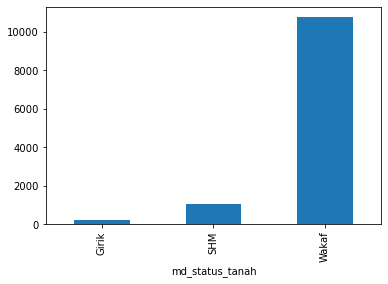

In [50]:
df_filter_by_malang_clean_year.groupby('md_status_tanah').count()['md_kecamatan'].plot.bar()

In [52]:
df_malang_gondanglegi = df_filter_by_malang_clean_year[df_filter_by_malang_clean_year['md_kecamatan'] == 'Gondanglegi']

In [53]:
df_malang_gondanglegi

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
10839,KAB. MALANG,Gondanglegi,Masjid Baitun Nor,Masjid di Tempat Publik,330,Wakaf,418,2006.0,50 - 100,1,4,4,6
13427,KAB. MALANG,Gondanglegi,Masjid SABILUL MUTTAQIN,Masjid Jami,298,Wakaf,290,1990.0,100 - 150,5,5,-,-
18143,KAB. MALANG,Gondanglegi,Masjid AL-UTSMAN,Masjid Jami,3480,Wakaf,719,1992.0,50 - 100,8,-,5,90
18540,KAB. MALANG,Gondanglegi,Masjid AINURROHMAH,Masjid Jami,409,Wakaf,409,1963.0,50 - 100,4,-,3,30
18682,KAB. MALANG,Gondanglegi,Masjid JANNATUL FIRDAUS,Masjid Jami,855,Wakaf,570,2018.0,50 - 100,5,-,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462653,KAB. MALANG,Gondanglegi,Mushalla Miftahus Shibyan,Mushalla Pendidikan,87,Wakaf,45,1987.0,> 50,3,-,2,-
462689,KAB. MALANG,Gondanglegi,Mushalla Al-Muhid Puteri,Mushalla Pendidikan,54,Wakaf,40,1951.0,16 - 30,11,-,-,-
464222,KAB. MALANG,Gondanglegi,Mushalla TARBIYATUSSHIBYAN,Mushalla Pendidikan,862,SHM,52,2005.0,5 - 15,2,-,-,-
464225,KAB. MALANG,Gondanglegi,Mushalla Al-Hidayah,Mushalla Pendidikan,6,Girik,6,2005.0,31 - 50,2,-,5,20


<AxesSubplot:xlabel='md_tahun_berdiri'>

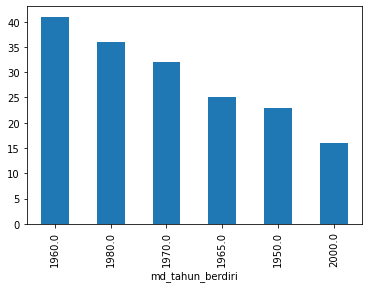

In [73]:
df_malang_gondanglegi.groupby('md_tahun_berdiri').count()['md_nama_masjid'].sort_values(ascending=False).head(6).plot.bar()


In [80]:
df_malang_gondanglegi_area = df_malang_gondanglegi[df_malang_gondanglegi['md_luas_bangunan'] != '-']

In [90]:
df_malang_gondanglegi_area = df_malang_gondanglegi_area.astype({'md_luas_bangunan':'int32','md_luas_tanah':'int32'})

In [94]:
df_malang_gondanglegi_area.sort_values('md_luas_tanah',ascending=True).tail(5)

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
265547,KAB. MALANG,Gondanglegi,Mushalla DARUL QUR'AN WAD DA'WAH,Mushalla Perumahan,5450,Wakaf,162,1982.0,> 50,3,-,6,50
265546,KAB. MALANG,Gondanglegi,Mushalla AT-TAQWA,Mushalla Perumahan,5450,Wakaf,162,1982.0,> 50,3,-,6,50
263416,KAB. MALANG,Gondanglegi,Mushalla PP AL-FUDLOLI,Mushalla Perumahan,6000,Wakaf,2000,1996.0,> 50,2,-,5,-
265167,KAB. MALANG,Gondanglegi,Mushalla AL-MUSTOFA,Mushalla Perumahan,7326,Wakaf,5684,1980.0,> 50,5,5,20,-
28642,KAB. MALANG,Gondanglegi,Masjid KH. AHMAD ZAMACHSYARI,Masjid Besar,13855,Wakaf,5000,2000.0,> 200,5,5,-,-


In [95]:
df_malang_gondanglegi_area.sort_values('md_luas_bangunan',ascending=True).tail(5)

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
263416,KAB. MALANG,Gondanglegi,Mushalla PP AL-FUDLOLI,Mushalla Perumahan,6000,Wakaf,2000,1996.0,> 50,2,-,5,-
130563,KAB. MALANG,Gondanglegi,Masjid AS-SYAFI'IYAH,Masjid Jami,3900,Wakaf,2750,1949.0,> 200,-,-,-,-
130253,KAB. MALANG,Gondanglegi,Masjid baitul muttagin,Masjid Jami,4200,Wakaf,3000,1950.0,> 200,-,-,-,-
28642,KAB. MALANG,Gondanglegi,Masjid KH. AHMAD ZAMACHSYARI,Masjid Besar,13855,Wakaf,5000,2000.0,> 200,5,5,-,-
265167,KAB. MALANG,Gondanglegi,Mushalla AL-MUSTOFA,Mushalla Perumahan,7326,Wakaf,5684,1980.0,> 50,5,5,20,-


In [105]:
df_malang_gondanglegi_area['md_luas_tanah'].corr(df_malang_gondanglegi_area['md_luas_bangunan'],method='pearson')

0.8590659954451902

In [106]:
df_malang_gondanglegi_area['md_luas_tanah'].corr(df_malang_gondanglegi_area['md_tahun_berdiri'],method='pearson')

0.033913512456045174

In [107]:
df_malang_gondanglegi_area['md_luas_bangunan'].corr(df_malang_gondanglegi_area['md_tahun_berdiri'],method='pearson')

-0.021395176185130288

In [109]:
df_malang_gondanglegi_area.groupby('md_jumlah_jamaah').count()['md_nama_masjid']

md_jumlah_jamaah
100 - 150      2
150 - 200      2
16 - 30      194
31 - 50      289
5 - 15         9
50 - 100       5
> 200         15
> 50         169
Name: md_nama_masjid, dtype: int64

<AxesSubplot:>

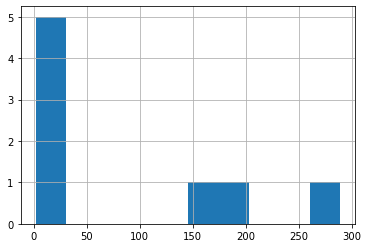

In [111]:
df_malang_gondanglegi_area.groupby('md_jumlah_jamaah').count()['md_nama_masjid'].hist()

In [113]:
df_malang_gondanglegi_area[df_malang_gondanglegi_area['md_jumlah_jamaah'] == '> 200' ].sort_values('md_luas_bangunan').tail(5)

,md_kabupaten_kota,md_kecamatan,md_nama_masjid,md_tipologi,md_luas_tanah,md_status_tanah,md_luas_bangunan,md_tahun_berdiri,md_jumlah_jamaah,md_jumlah_imam,md_jumlah_khatib,md_jumlah_muazin,md_jumlah_remaja
130287,KAB. MALANG,Gondanglegi,Masjid AL-ROSYID,Masjid Jami,2500,Wakaf,1500,1960.0,> 200,-,-,-,-
33163,KAB. MALANG,Gondanglegi,Masjid Al-Ikhlas,Masjid Besar,2306,Wakaf,1648,1917.0,> 200,10,20,-,-
130563,KAB. MALANG,Gondanglegi,Masjid AS-SYAFI'IYAH,Masjid Jami,3900,Wakaf,2750,1949.0,> 200,-,-,-,-
130253,KAB. MALANG,Gondanglegi,Masjid baitul muttagin,Masjid Jami,4200,Wakaf,3000,1950.0,> 200,-,-,-,-
28642,KAB. MALANG,Gondanglegi,Masjid KH. AHMAD ZAMACHSYARI,Masjid Besar,13855,Wakaf,5000,2000.0,> 200,5,5,-,-
